Well, let's hope we had a grand old time working with some simulated lightcurves yesterday

Time for .... (drumroll please) ....

# TESS

Take a second to get to know this glorious bastard and her 7 year reign: 
https://science.nasa.gov/mission/tess/

To download a TESS lightcurve on Python, you will need the $\texttt{lightkurve}$ package.

Q. Using the $\texttt{pip}$ tool, how does one install a package on Python?

**Before proceeding, ensure you have installed the $\texttt{lightkurve}$ package using the $\texttt{pip}$ tool**

In [9]:
from lightkurve import search_lightcurve
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Downloading the light curve the planet pi Mensae c, one of the most famous TESS planets
# pi Mensae c is an evaporating Super-Earth orbiting 0.07 AU away from its star, 50x closer than Mercury does
# https://exoplanets.nasa.gov/news/1542/nasas-tess-rounds-up-its-first-planets-snares-far-flung-supernovae/
lc_search = search_lightcurve("pi Mensae", author = "SPOC", mission = "TESS", sector = 1)
lc = lc_search.download()

In [3]:
# Quick cleanup of the data. Fret not my child, for there will heaps of data reduction demons left for you to vanquish!
lc = lc.normalize().remove_outliers()

In [27]:
# Get the time and flux information
time = lc.time.value
flux = lc.flux.value

0.99999475


In [6]:
# TODO: Plot the lightcurve
# Do you see a planet?
# If not, please call me a liar

### Q. Estimate the period by eye 👀

Look at the dips in the light curve — the planet is blocking light from the star once per orbit.  
How far apart (in days) do you think those dips are?  
Hint: the x-axis is in days.  

Write your best guess below:

In [19]:
# TODO: Your estimated period (in days)
my_estimated_period =  # e.g., 2.4

“Alright legend, you’ve had a crack by eye — now let’s bring in the big guns.”

### 🧙 Enter the Box Least Squares (BLS)

What you just did by eye — scanning the light curve and trying to line up dips — is exactly what BLS does, except without your mediocre, unreliable human eyes and with more math.

BLS tries thousands of trial periods, folds the light curve for each, and scores how well the dips align into a nice, box-shaped transit at each period.  
The period with the strongest signal wins. 🏆

In [16]:
from astropy.timeseries import BoxLeastSquares
bls = BoxLeastSquares(time, flux)
periods = np.linspace(1, 10, 10000)
results = bls.power(periods, 0.05)

best_period = periods[np.argmax(results.power)]
print(f"Best period: {best_period:.4f} days")

Best period: 6.2781 days


**How close were ya?**

In [20]:
diff = np.abs(best_period - my_estimated_period)

if diff < 0.5:
    print(f"Good work! You were only off by {diff:.3f} days. Legend.")
elif diff < 2:
    print(f"Not bad! You were off by {diff:.3f} days. Not quite Bazball, but respectable.")
elif diff < 1000:
    print(f"Bit rough there… off by {diff:.3f} days. But hey, you tried.")
else:
    print("Wtf did you smoke, son? That’s not even in the same solar system.")

Bit rough there… off by 23.722 days. But hey, you tried.


### 📈 Phase-fold the light curve

Now that we know the period of $\pi$ Mensae b, let’s fold the light curve on this period so all the transits line up nicely.

In [26]:
# TODO:
# How do you convert from time to phase? Remember from yesterday?
# Hint: It is a 2 step process.
# 1. Convert from time to units of period
# 2. Convert from period to the range [0,1]

In [25]:
# TODO:
# Great, if you did that right, you should now have orbital phase
# Plot the flux vs orbital phase

### 🌑 Estimate planet-to-star radius ratio

Transit depth \( $\delta$ \) is just how much light gets blocked during transit.
Let’s estimate \( $R_p / R_* = \sqrt{\delta}$ \).

In [ ]:
# TODO: Use the min() function from NumPy (np.min()) to estimate the lowest value of flux
# Use this minimum value of flux to get the transit depth

In [ ]:
# TODO: Using the transit depth, find the ratio of the radii of the planet and the star

In [ ]:
# TODO: Using the internet, look up the radius of the host star 
# (The planet is called pi Mensae c, implying it is planet c around the star pi Mensae)
rStar =   # Radius of the star

### 🪐 Estimate the semi-major axis

Kepler’s 3rd law relates the period to the distance from the star.

\begin{equation*}
P^2 = \frac{a^3}{M}
\end{equation*}

where P is the orbital period of the planet in years and M is the mass of the host star in solar masses

In [ ]:
# TODO: Assuming you have looked up the radius of the star, you are now ready to look up its mass
# I believe in you mate, it is time!
mStar =   # Mass of the star, in Solar Masses 

# TODO: The period you have been working with is in units of ...... 
# You need to convert it to years

# TODO: Use Kepler's Third Law to find the semi-major axis of the planet
# Semi-major axis will have units AU (Astronomical Unit, avg distance between the Earth and the Sun)

### 🔄Eccentricity

Eccentricity is a measure of how circular a planet's orbit is. An eccentricity of 0 is a perfectly circular orbit, an eccentricity of 1 is a parabola. Anything in between is an ellipse (oval shaped weird thingo). The Earth has an eccentricity of 0.0167.

Pi Mensae c has an eccentricity $e = 0.15$

Given the eccentricity and semi-major axis (which you should have calculated), you can now compute how close to and far away from the star the planet gets, called periastron and apastron, respectively.

\begin{equation}
    \mathrm{periastron} = a(1-e)
\end{equation}

\begin{equation}
    \mathrm{apastron} = a(1+e)
\end{equation}

In [ ]:
# TODO: Using the semi-major axis and eccentricity of Pi Mensae c, compute its periastron and apastron in AU 

### 🌡️ Equilibrium Temperature

Alright hotshot, you’ve figured out how close and far π Mensae c gets to its star.  
But how hot does it actually get? Let’s estimate the planet’s temperature at **periastron (summer)** and **apastron (winter)**.

We’ll use the simple *equilibrium temperature* formula, assuming the planet is a blackbody and ignoring atmospheres (sorry greenhouse gases, not today):

\begin{equation}
T_{\mathrm{eq}} = T_{\star} \sqrt{\frac{R_{\star}}{2d}}
\end{equation}

where:
- \( $T_\star$ \) = stellar effective temperature (look it up)
- \( $R_\star$ \) = stellar radius (in solar radii, but convert to AU: \( 1$R_{\odot}$ = 0.00465 AU \))
- \( $d$ \) = distance of planet from star (in AU — you already calculated periastron and apastron)

This assumes the planet reflects no light (albedo = 0) and has perfect heat distribution.

Your task:  
Estimate \( $T_{\mathrm{eq}}$ \) at **periastron** and **apastron**.  
Write your answers in Kelvin.  

In [ ]:
# TODO: Look up the star’s effective temperature (T_star ~5900K)
T_star = 

# TODO: Convert the star’s radius to AU (R_star in solar radii * 0.00465)
R_star = 

# TODO: Compute T_eq at periastron
d_peri =  # you already computed this earlier
T_eq_peri = T_star * np.sqrt(R_star / (2 * d_peri))

# TODO: Compute T_eq at apastron
d_apa =  # you already computed this earlier
T_eq_apa = T_star * np.sqrt(R_star / (2 * d_apa))

print(f"At periastron: {T_eq_peri:.1f} K")
print(f"At apastron:  {T_eq_apa:.1f} K")

In [ ]:
# BONUS TODO: Try to plot the equilibrium temperature of the planet as a function of distance from the star, 
# from periastron to apastron
# Solution in the cell below

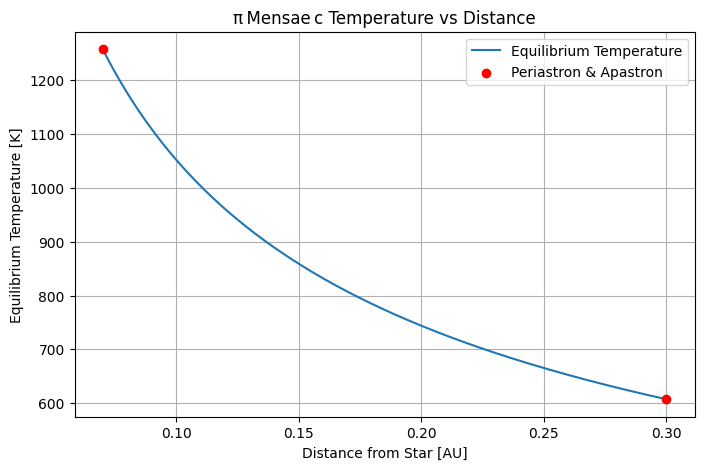

In [33]:
d_vals = np.linspace(d_peri, d_apa, 500)
T_eq_vals = T_star * np.sqrt(R_star / (2 * d_vals))

# Compute T_eq at periastron and apastron
T_eq_peri = T_star * np.sqrt(R_star / (2 * d_peri))
T_eq_apa  = T_star * np.sqrt(R_star / (2 * d_apa))

# Plot
plt.figure(figsize=(8,5))
plt.plot(d_vals, T_eq_vals, label="Equilibrium Temperature")
plt.scatter([d_peri, d_apa], [T_eq_peri, T_eq_apa], color='red', zorder=5,
            label="Periastron & Apastron")

plt.xlabel("Distance from Star [AU]")
plt.ylabel("Equilibrium Temperature [K]")
plt.title("Pi Mensae c Temperature vs Distance")
plt.legend()
plt.show()